In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from SOM_clustering.som import SOM

In [2]:
df = pd.read_csv("Datas/selected_data.csv")
df.drop_duplicates(inplace=True)
df

,C,F,N,O,S
0,20,0,4,2,1
1,13,0,1,1,1
2,12,0,3,1,0
3,16,2,2,1,0
4,18,0,3,0,0
...,...,...,...,...,...
61934,23,0,0,9,0
61961,22,0,2,0,1
62018,5,3,4,3,0
62040,29,2,3,2,0


<Axes: >

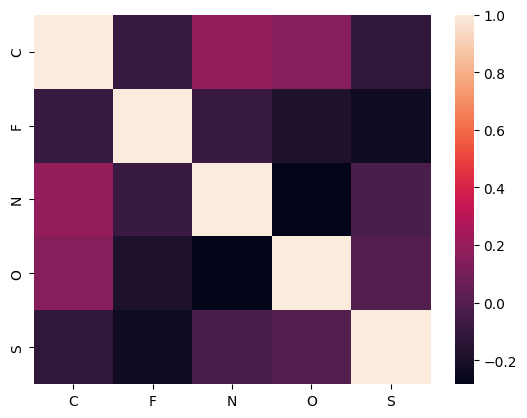

In [3]:
sns.heatmap(df.corr())

In [4]:
X = df.values
model = SOM(m = 3,
            n = 1, 
            dim=X.shape[1],
            max_iter=1,
            initiate_method="SOM++",
            learning_rate=0.5,
            neighbour_rad=5)
model.fit(X, epoch=50)
model.neurons

array([[[17,  1,  2,  2,  0]],

       [[ 9,  3,  1,  0,  0]],

       [[24,  0,  2,  0,  0]]], dtype=int64)

In [5]:
cluster_centers = model.neurons
cluster_centers = np.reshape(cluster_centers, (-1,X.shape[1]))
cluster_centers.shape

(3, 5)

In [6]:
cc = pd.DataFrame(cluster_centers, columns=df.columns)
cc.dropna(axis=1, inplace=True)
cc.round(4)

,C,F,N,O,S
0,17,1,2,2,0
1,9,3,1,0,0
2,24,0,2,0,0


In [7]:
cc.round(4).to_excel("Datas/Stats/clustercenters.xlsx", index=False)
cc.round(4).to_csv("Datas/Stats/clustercenters.csv", index=False)